## 安装
Python 通过 rpy2 可直接调用 R, rpy2 在 windows 下兼容性有问题，所以在 windows 下建议使用 WSL。

在 WSL ubuntu 下安装 rpy2 ，有可能出现 cairo.so 加载不了，那是因为系统没有安装 cairo 绘图库，Ubuntu 系统下有很多相关的包，不知道具体安装哪一个，可间接安装：

```
sudo apt install cairosvg python3-cairo
```

rpy2 在 notebook 可启用 RMagic，方便编码：

```
%load_ext rpy2.ipython
```

In [1]:
%load_ext rpy2.ipython

In [2]:
%%R -w 800 --type=cairo
R.version.string

[1] "R version 4.2.0 (2022-04-22)"


In [3]:
%%R
library("xts")
library("zoo")
library("TTR")
library("quantmod")
library("httr")
library("data.table")
library("tibble")

R[write to console]: Loading required package: zoo

R[write to console]: 
Attaching package: ‘zoo’


R[write to console]: The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


R[write to console]: Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

R[write to console]: data.table 1.14.2 using 4 threads (see ?getDTthreads).  Latest news: r-datatable.com

R[write to console]: 
Attaching package: ‘data.table’


R[write to console]: The following objects are masked from ‘package:xts’:

    first, last




In [4]:
%%R
res <- GET("https://q.stock.sohu.com/hisHq?code=cn_600036&start=20210101&end=20220813", add_headers('Content-Type'='application/json'))
result <- content(res, as="parsed", encoding="utf-8", type="application/json" )
result <- result[[1]]$hq

result <- t(as.data.table(result))
result <- as_tibble(result)
setnames(result, c('Date', 'Open','Close','Incr_rate', 'Incr_percent','Low', 'High', 'Volume', 'Value', 'Change_rate'))

library(lubridate, warn.conflicts = FALSE)

result$Date <- ymd(result$Date)
result$Open <- as.double(result$Open)
result$Close <- as.double(result$Close)
result$Low <- as.double(result$Low)
result$High <- as.double(result$High)
result$Volume <- as.double(result$Volume)
print(result)

# A tibble: 391 × 10
   Date        Open Close Incr_rate Incr_percent   Low  High  Volume Value    
   <date>     <dbl> <dbl> <list>    <list>       <dbl> <dbl>   <dbl> <list>   
 1 2022-08-12  34.2  34.4 <chr [1]> <chr [1]>     34.0  34.4  402000 <chr [1]>
 2 2022-08-11  33.5  34.4 <chr [1]> <chr [1]>     33.2  34.4  826688 <chr [1]>
 3 2022-08-10  33.6  33.2 <chr [1]> <chr [1]>     33.0  33.7  529605 <chr [1]>
 4 2022-08-09  34.0  33.6 <chr [1]> <chr [1]>     33.4  34.0  498671 <chr [1]>
 5 2022-08-08  34.2  33.9 <chr [1]> <chr [1]>     33.6  34.5  572112 <chr [1]>
 6 2022-08-05  33.8  34.3 <chr [1]> <chr [1]>     33.6  34.3  488719 <chr [1]>
 7 2022-08-04  33.3  33.7 <chr [1]> <chr [1]>     33.2  33.7  593073 <chr [1]>
 8 2022-08-03  33.9  33.1 <chr [1]> <chr [1]>     33.0  34.5 1003206 <chr [1]>
 9 2022-08-02  34.2  33.9 <chr [1]> <chr [1]>     33.3  34.2  811608 <chr [1]>
10 2022-08-01  35.0  34.5 <chr [1]> <chr [1]>     34.4  35.0  705883 <chr [1]>
# … with 381 more rows, and 1 m

System has not been booted with systemd as init system (PID 1). Can't operate.
Failed to connect to bus: Host is down


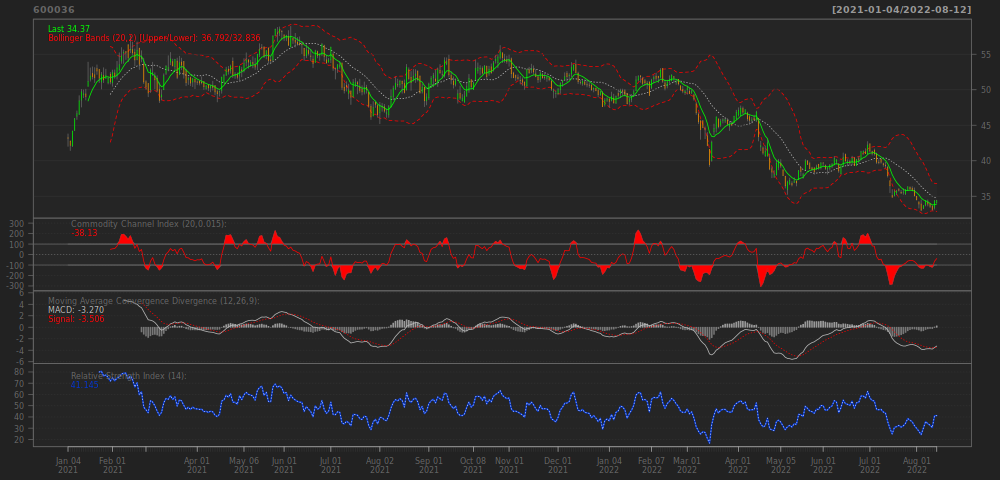

R[write to console]: Warning messages:

R[write to console]: 1: 
R[write to console]: In grSoftVersion() :
R[write to console]: 
 
R[write to console]:  unable to load shared object '/home/twn39/miniconda3/lib/R/modules//R_X11.so':
  libXt.so.6: cannot open shared object file: No such file or directory

R[write to console]: 2: The `x` argument of `as_tibble.matrix()` must have unique column names if `.name_repair` is omitted as of tibble 2.0.0.
Using compatibility `.name_repair`.
This warning is displayed once every 8 hours.
Call `lifecycle::last_lifecycle_warnings()` to see where this warning was generated. 

R[write to console]: 3: 
R[write to console]: In system("timedatectl", intern = TRUE) :
R[write to console]: 
 
R[write to console]:  running command 'timedatectl' had status 1



In [5]:
%%R -w 1000
rxt <- result[, 2:3]
rxt$High <- result$High
rxt$Low <- result$Low
rxt$Volume <- result$Volume
rxt$Date <- result$Date
rxt <- as.xts(rxt[, 1:5], order.by=rxt$Date)
chartSeries(rxt, name="600036", TA="addCCI();addMACD();addBBands();addRSI();addWMA()")